In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
def getValues(_dir, _base_name, index):
    name = _base_name  + str(index)
    file_name = _dir + name + ".histo"
    f = open(file_name, "r")
    ranges = []
    result = []

    for line in f:
        range, freq = line.strip().split(" ")
        ranges.append(range)
        result.append(int(freq))
        
    f.close()
    return ranges, result, name

In [103]:
def getDF(_dir, _base_name, max, formatter):
    dfs = dict()
    categories = []
    for iteration in range(0, max):
        cat, result, name = getValues(_dir, _base_name, iteration)
        categories = formatter(cat)
        dfs[name] = formatter(result)
        
    dfs["ranges"] = categories
        
    return pd.DataFrame(dfs)

In [104]:
def plotDF(df):
    ax = df.plot.bar(rot=0, width=0.8, figsize=(10, 5), x="ranges",  title="Elementos por refinar por threshold para primeras 5 iteraciones", ylabel="Frecuencia elementos de mala calidad", xlabel="Threshold")
    for container in ax.containers:
        ax.bar_label(container, padding=3)

In [105]:
# plotDF(dfs)

In [106]:
# dfs

In [107]:
def generateFit(_df, _base_name):
    _datos = _df.values[0][:-1]
    # Posiciones en la secuencia
    _n = np.arange(len(_datos))
    # Calcular el promedio geométrico de los cocientes
    _cocientes = _datos[1:] / _datos[:-1]
    _razon_promedio = np.prod(_cocientes) ** (1/len(_cocientes))
    # Ajustar el modelo exponencial
    _a = _datos[0]
    _model_exp = _a * _razon_promedio ** _n
    _x = _df.columns[:-1]
    plt.figure(figsize=(10, 6))
    plt.plot(_x, _datos, 'o-', label='Datos originales', markersize=8)
    plt.plot(_x, _model_exp, 'r--', label=f'Modelo Exponencial ($y = 21 \cdot {_razon_promedio:.2f}^n$)')

    # Añadir títulos y etiquetas
    plt.title('Ajuste Exponencial de la cantidad de Octantes por refinar.')
    plt.xlabel('Iteraciones ({}n)'.format(_base_name))
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

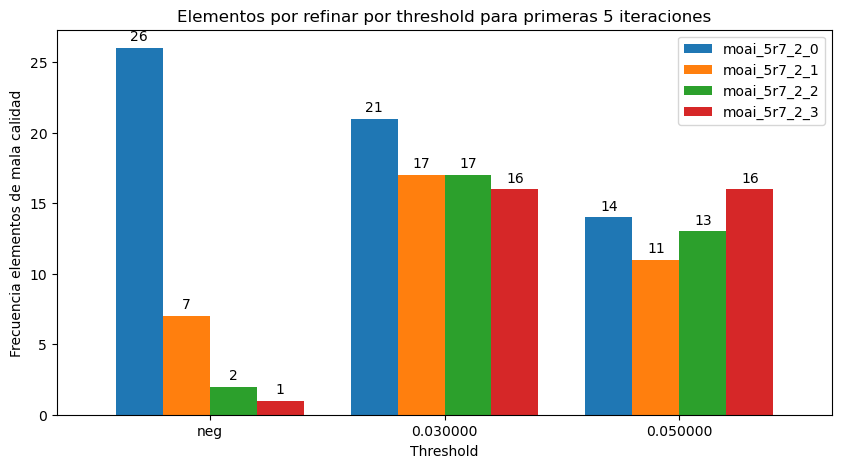

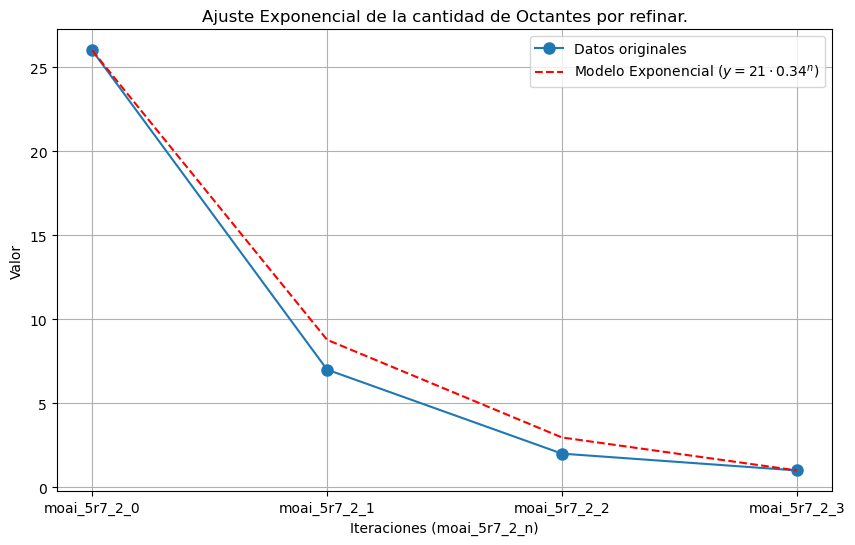

In [108]:
dir = "../data_analysis/moai_5r7_c1/"
# base_name = "c_5r7_"
base_name = "moai_5r7_2_"
dfs = getDF(dir, base_name, 4, formatter=lambda x: list(x)[:3])
plotDF(dfs)
generateFit(dfs, base_name)

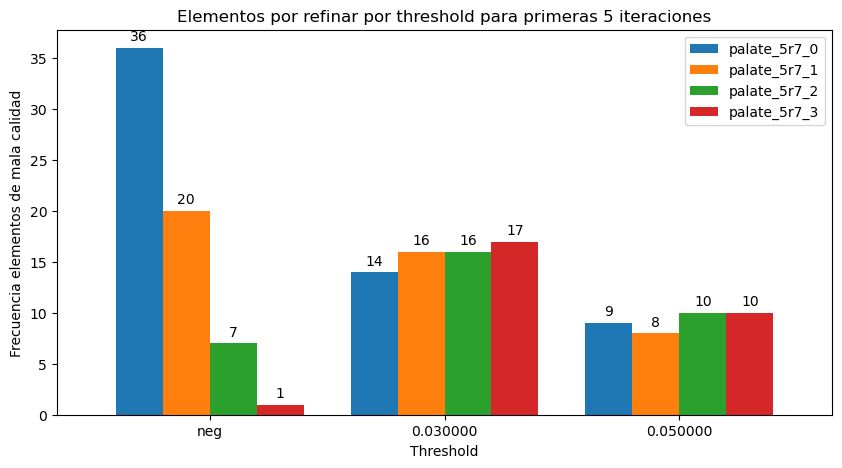

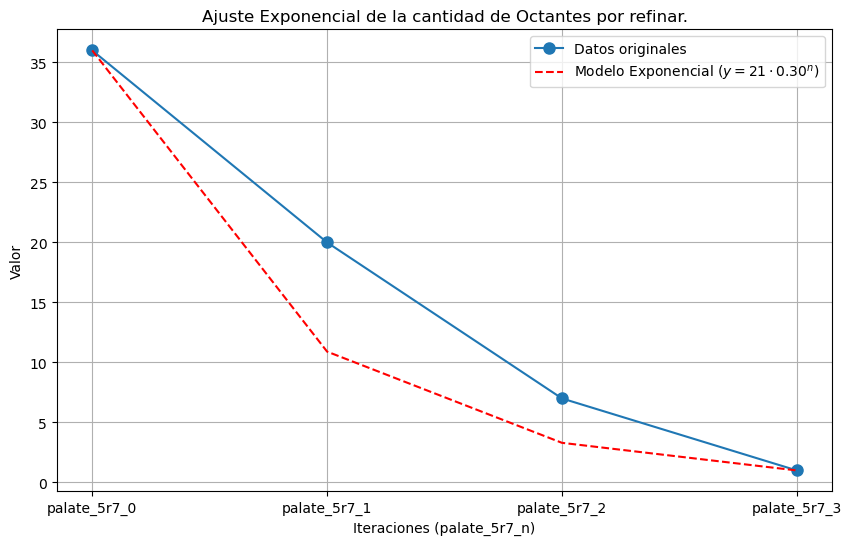

In [109]:
# dir = "../data_analysis/moai_5r7_c1/"
dir = "../data_analysis/palate_5r7_c1/"
# base_name = "c_5r7_"
base_name = "palate_5r7_"
dfs = getDF(dir, base_name, 4, formatter=lambda x: list(x)[:3])
plotDF(dfs)
generateFit(dfs, base_name)

In [110]:
def generateAnalysis(_dir_name, _base_name):
    dfs = getDF(_dir_name, _base_name, 4, formatter=lambda x: list(x)[:3])
    plotDF(dfs)
    generateFit(dfs, _base_name)

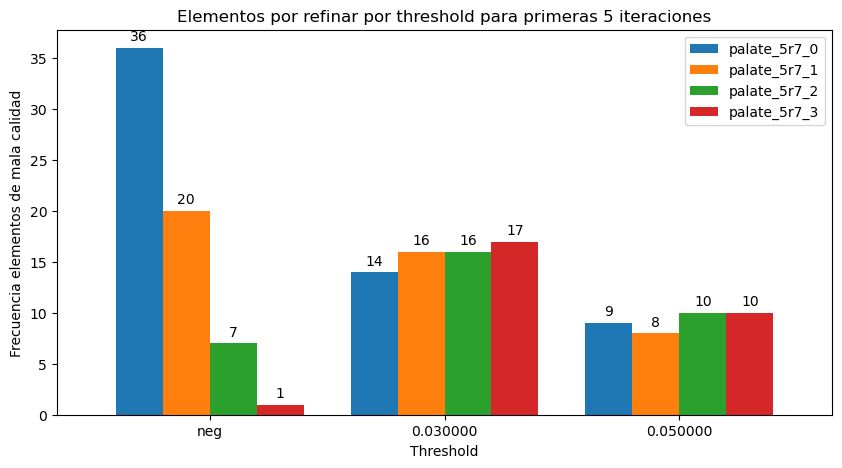

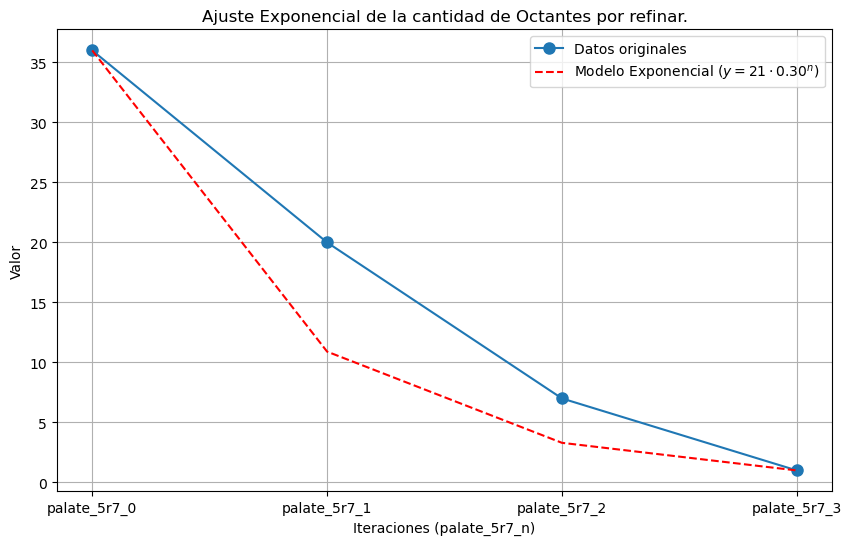

In [112]:
base_name = "palate_5r7_"
dir_name = "../data_analysis/{}c{}/".format(base_name, 1)
generateAnalysis(dir_name, base_name)

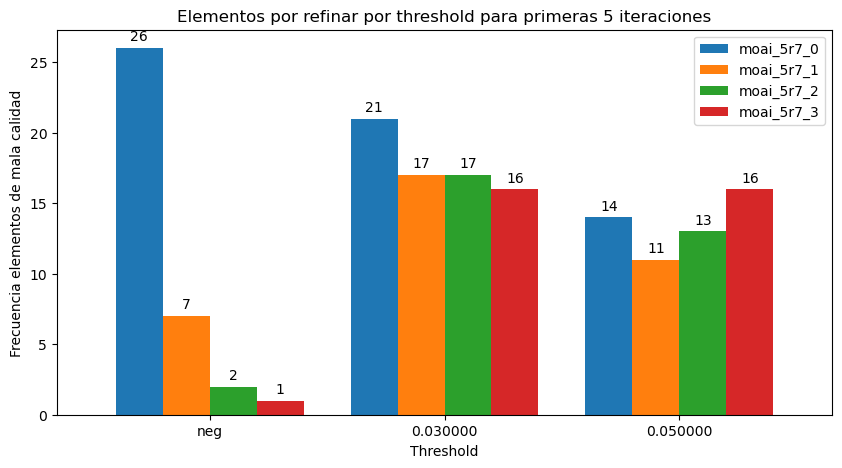

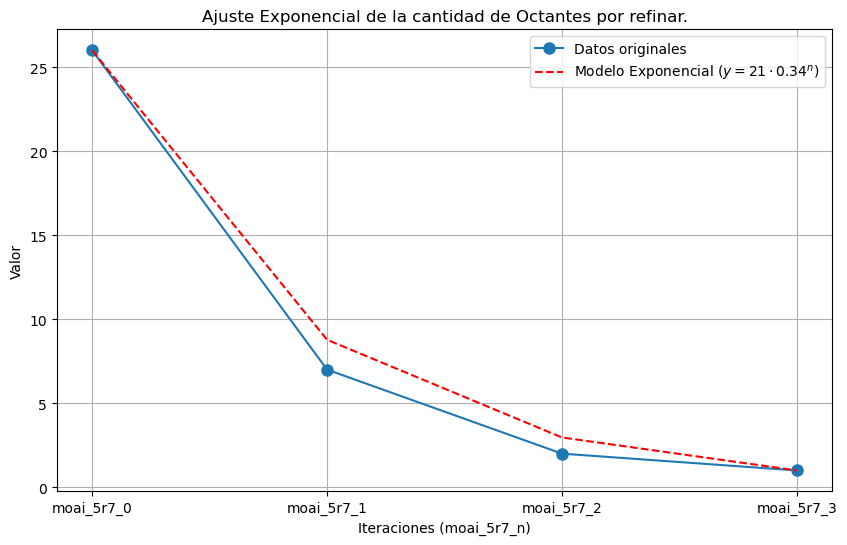

In [114]:
base_name = "moai_5r7_"
dir_name = "../data_analysis/{}c{}/".format(base_name, 1)
generateAnalysis(dir_name, base_name)

In [ ]:
base_name = "moai_5r7_"
iteration = 2
dir_name = "../data_analysis/{}c{}/".format(base_name, iteration)
base_name = base_name + str(iteration) + "_"
generateAnalysis(dir_name, base_name)

In [ ]:
def getNames(_base_name, _it):
    dir_name = "../data_analysis/{}c{}/".format(_base_name, _it)
    base_name = _base_name + str(_it) + "_"
    generateAnalysis(dir_name, base_name)

In [ ]:
getNames("moai_5r7_", 1)